In [2]:
pip install tensorflow 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install opencv-python


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install opencv-contrib-python


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import numpy as np
from tensorflow import keras
import os

In [6]:
import cv2

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image 
import matplotlib.pyplot as plt

In [8]:
train=ImageDataGenerator(rescale=1/255)
test=ImageDataGenerator(rescale=1/255)
train_dataset=train.flow_from_directory(r"C:/Users/HP/OneDrive/Desktop/forest_fire/Training and Validation/",
                                        target_size=(150,150),
                                       batch_size=32,
                                       class_mode='binary')
test_dataset=train.flow_from_directory(r"C:/Users/HP/OneDrive/Desktop/forest_fire/Testing/",
                                        target_size=(150,150),
                                       batch_size=32,
                                       class_mode='binary')

Found 2215 images belonging to 2 classes.
Found 68 images belonging to 2 classes.


In [9]:
test_dataset.class_indices

{'fire': 0, 'nofire': 1}

In [10]:
model=keras.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D (2,2)) 

model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.MaxPool2D (2,2))

model.add(keras.layers.Conv2D (128, (3,3), activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))


model.add(keras.layers. Flatten())
model.add(keras.layers.Dense (512, activation='relu'))
model.add(keras.layers. Dense (1, activation='sigmoid'))

In [11]:
model.compile(optimizer='adam',loss="binary_crossentropy",metrics=['accuracy'])

In [24]:
r=model.fit(train_dataset,epochs=7,validation_data=test_dataset)

Epoch 1/7
70/70 [==============================] - 83s 1s/step - loss: 0.0572 - accuracy: 0.9788 - val_loss: 0.0477 - val_accuracy: 1.0000
Epoch 2/7
70/70 [==============================] - 84s 1s/step - loss: 0.0417 - accuracy: 0.9865 - val_loss: 0.0391 - val_accuracy: 0.9853
Epoch 3/7
70/70 [==============================] - 85s 1s/step - loss: 0.0379 - accuracy: 0.9869 - val_loss: 0.0276 - val_accuracy: 0.9853
Epoch 4/7
70/70 [==============================] - 89s 1s/step - loss: 0.0280 - accuracy: 0.9896 - val_loss: 0.0702 - val_accuracy: 0.9853
Epoch 5/7
70/70 [==============================] - 90s 1s/step - loss: 0.0124 - accuracy: 0.9968 - val_loss: 0.0536 - val_accuracy: 0.9853
Epoch 6/7
70/70 [==============================] - 86s 1s/step - loss: 0.0623 - accuracy: 0.9788 - val_loss: 0.2713 - val_accuracy: 0.9559
Epoch 7/7
55/70 [======================>.......] - ETA: 17s - loss: 0.0510 - accuracy: 0.9839

KeyboardInterrupt: 

In [13]:
pred=model.predict(test_dataset)
pred=np.round(pred)

3/3 [==============================] - 1s 164ms/step


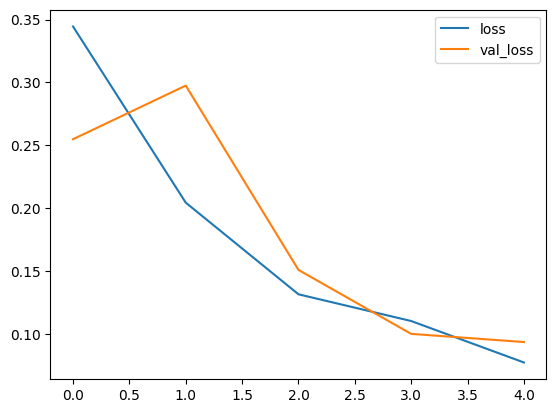

In [14]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

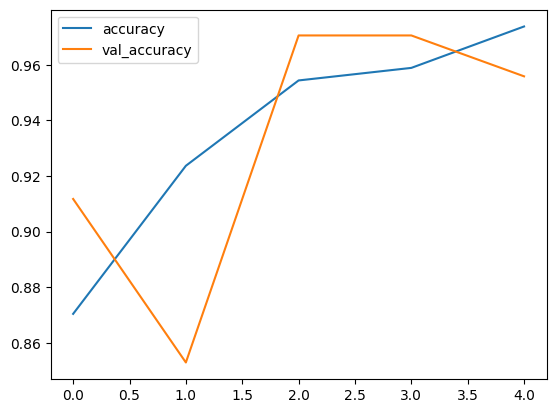

In [15]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

In [16]:
def p(filename):
    img1=image.load_img(filename,target_size=(150,150))
    plt.imshow(img1)
    y=image.img_to_array(img1)
    x=np.expand_dims(y,axis=0)
    val= model.predict(x)
    print(val)
    if val==1:
        plt.xlabel("No Fire")
    else:
        plt.xlabel("Fire")

1/1 [==============================] - 0s 72ms/step
[[1.]]


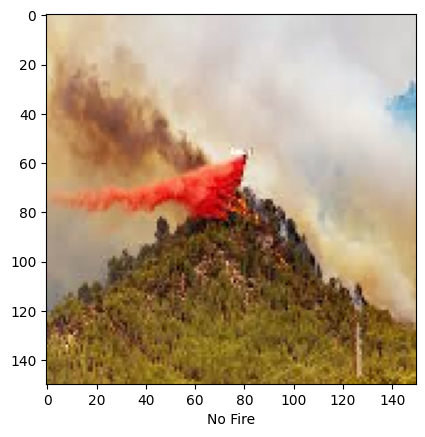

In [25]:
p(r"C:/Users/HP/OneDrive/Desktop/forest_fire/4.jpeg")

1/1 [==============================] - 0s 78ms/step
[[1.]]


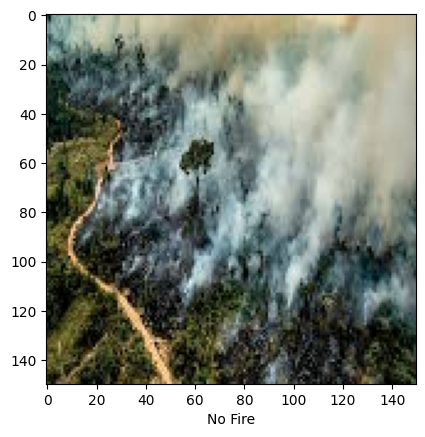

In [26]:
p(r"C:/Users/HP/OneDrive/Desktop/forest_fire/0.jpeg")

1/1 [==============================] - 0s 81ms/step
[[0.]]


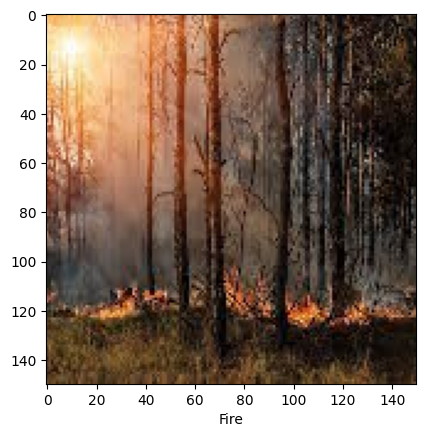

In [21]:
p(r"C:/Users/HP/OneDrive/Desktop/forest_fire/1.jpeg")

1/1 [==============================] - 0s 73ms/step
[[1.]]


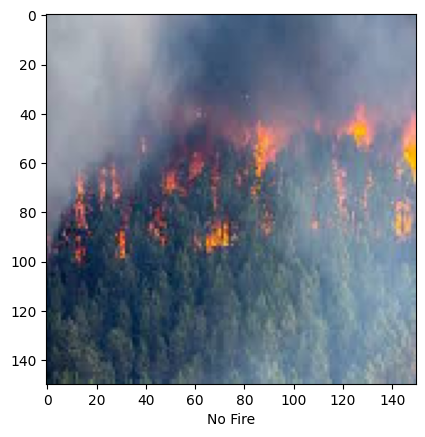

In [23]:
p(r"C:/Users/HP/OneDrive/Desktop/forest_fire/2.jpeg")

1/1 [==============================] - 0s 44ms/step
[[1.]]


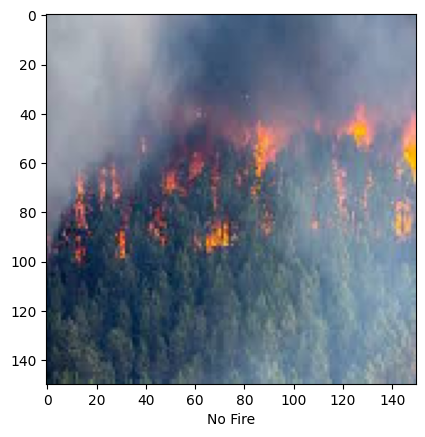

1/1 [==============================] - 0s 83ms/step
[[0.]]


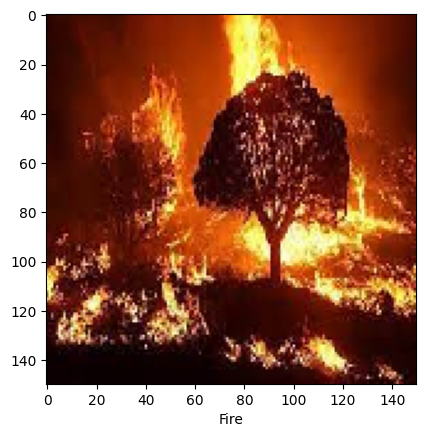

In [27]:
p(r"C:/Users/HP/OneDrive/Desktop/forest_fire/check.jpeg")

1/1 [==============================] - 0s 79ms/step
[[1.]]


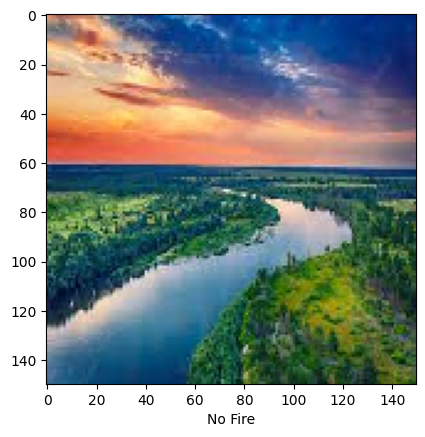

In [28]:
p(r"C:/Users/HP/OneDrive/Desktop/forest_fire/check2.jpeg")